<a href="https://colab.research.google.com/github/ssarker21/Introduction-to-Machine-Learning/blob/main/Homework2_1(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipython-input-1208172021.py:44: RuntimeWarning: overflow encountered in square
  val_losses.append(np.mean(((X_val @ theta) - y_val) ** 2))
/tmp/ipython-input-1208172021.py:43: RuntimeWarning: overflow encountered in square
  train_losses.append(np.mean((y_hat - y) ** 2))
/tmp/ipython-input-1208172021.py:41: RuntimeWarning: overflow encountered in matmul
  grad  = (2.0 / n) * (X.T @ (y_hat - y))
/tmp/ipython-input-1208172021.py:41: RuntimeWarning: invalid value encountered in matmul
  grad  = (2.0 / n) * (X.T @ (y_hat - y))
/tmp/ipython-input-1208172021.py:42: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * grad


=== Final Model Parameters ===
      bias: nan
      area: nan
  bedrooms: nan
 bathrooms: nan
   stories: nan
   parking: nan

Training MSE: nan
Validation MSE: nan


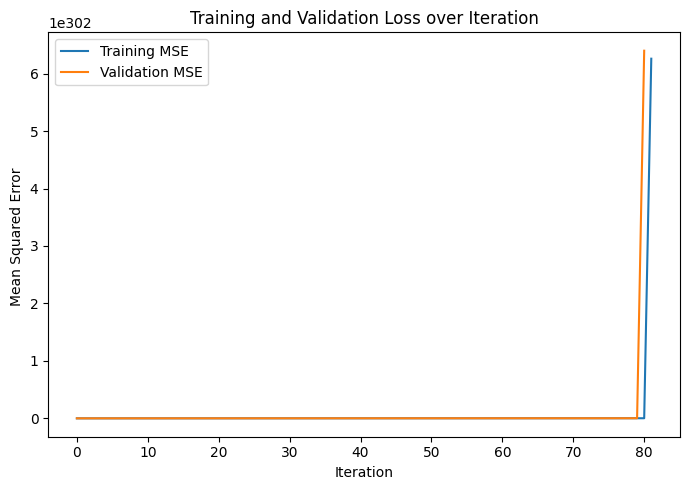

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# -----------------------------
# Load dataset
# -----------------------------
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
df = pd.read_csv(url)

features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target   = "price"

X = df[features].values.astype(float)
y = df[target].values.astype(float).reshape(-1, 1)

# -----------------------------
# Train/Validation split (80/20)
# -----------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=100, shuffle=True
)

# Add bias column
def add_bias(Z):
    return np.hstack([np.ones((Z.shape[0], 1)), Z])

Xtr = add_bias(X_train)
Xva = add_bias(X_val)

# -----------------------------
# Gradient Descent (from scratch)
# -----------------------------
def train_gd(X, y, X_val, y_val, lr=1e-7, epochs=800):
    n, d = X.shape
    theta = np.zeros((d, 1))
    train_losses, val_losses = [], []
    for t in range(epochs):
        y_hat = X @ theta
        grad  = (2.0 / n) * (X.T @ (y_hat - y))
        theta -= lr * grad
        train_losses.append(np.mean((y_hat - y) ** 2))
        val_losses.append(np.mean(((X_val @ theta) - y_val) ** 2))
    return theta, np.array(train_losses), np.array(val_losses)


LEARNING_RATE = 0.000001
EPOCHS = 1000
theta_best, train_losses, val_losses = train_gd(Xtr, y_train, Xva, y_val, lr=LEARNING_RATE, epochs=EPOCHS)


print("=== Final Model Parameters ===")
for name, coef in zip(["bias"] + features, theta_best.flatten()):
    print(f"{name:>10}: {coef:.4f}")


train_mse = np.mean(((Xtr @ theta_best) - y_train)**2)
val_mse   = np.mean(((Xva @ theta_best) - y_val)**2)

print("\nTraining MSE:", round(train_mse,2))
print("Validation MSE:", round(val_mse,2))

# -----------------------------
# Plot Loss
# -----------------------------
plt.figure(figsize=(7,5))
plt.plot(train_losses, label="Training MSE")
plt.plot(val_losses, label="Validation MSE")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error ")
plt.title(f"Training and Validation Loss over Iteration")
plt.legend()
plt.tight_layout()
plt.show()